### Introduction
In this notebook, the Human Activity Recognition dataset from UCI ML Repository was first explored. The features and target variables were extracted and the train-test data were combined. The ultimate goal is to classify the 12 classes with great accuracy. 

The initial HAR dataset only included 6 main activities. The updated dataset have both activities and postural transitions. The transitions, unfortunately, are limited in terms of recorded data. 

The dataset large with many features. So, feature and dimensionality reduction will take place. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn import decomposition, datasets

I have started from original data in TXT format at UCI ML repository. Here data is already split into train and test sets. 

In [2]:
X_test = pd.read_csv('./UCI HAR Dataset/data/X_test.txt',delim_whitespace=True, header=None)
X_test.shape

(3162, 561)

In [3]:
y_test = pd.read_csv('./UCI HAR Dataset/data/y_test.txt',delim_whitespace=True, header=None)
y_test.shape

(3162, 1)

In [4]:
X_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302


In [5]:
y_test.head(3)

,0
0,5
1,5
2,5


In [6]:
feature_names_extracted=pd.read_csv('./UCI HAR Dataset/features.txt',delim_whitespace=True, header=None)
feature_names_extracted.head(4)
feature_names_extracted.shape

(561, 2)

In [7]:
feature_names=feature_names_extracted.iloc[:,1]
feature_names.shape
feature_names[2]

'tBodyAcc-mean()-Z'

In [8]:
X_test = X_test.rename(columns = feature_names)
X_test.head(6)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
5,0.039803,-0.004316,-0.022932,-0.994558,-0.979556,-0.974890,-0.994480,-0.979701,-0.978969,-0.797702,...,0.133895,-0.504415,-0.856842,-0.095681,0.048849,0.760684,-0.072216,-0.690425,0.294875,-0.061498


In [9]:
activity_names_extracted=pd.read_csv('./UCI HAR Dataset/data/activity_labels.txt',delim_whitespace=True, header=None)
activity_names_extracted

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING
6,7,STAND_TO_SIT
7,8,SIT_TO_STAND
8,9,SIT_TO_LIE
9,10,LIE_TO_SIT


In [10]:
X_test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [11]:
mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING', 7:'STAND_TO_SIT', 8:'SIT_TO_STAND',9:'SIT_TO_LIE', 10:'LIE_TO_SIT', 11:'STAND_TO_LIE',12:'LIE_TO_STAND'}

In [12]:
y_test=y_test.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [13]:
y_test.head(5)

,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [14]:
y_test.shape

(3162, 1)

In [15]:
y_test=y_test.rename(columns = {0:'target_activity'})

In [16]:
y_test.head()

,target_activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [17]:
X_test.dtypes.head(3)

tBodyAcc-mean()-X    float64
tBodyAcc-mean()-Y    float64
tBodyAcc-mean()-Z    float64
dtype: object

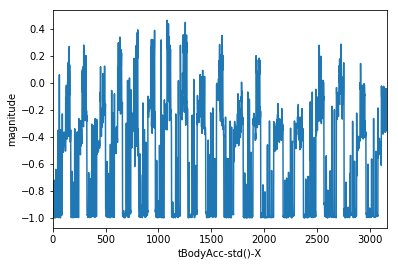

In [18]:
plt.figure();
X_test.iloc[:,3].plot() # plot the column
plt.xlabel(feature_names[3])
plt.ylabel('magnitude')
plt.show()

(7767, 561)


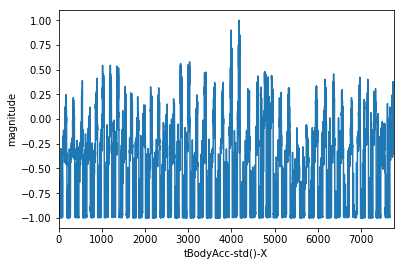

In [19]:
X_train = pd.read_csv('./UCI HAR Dataset/data/X_train.txt',delim_whitespace=True, header=None)
print(X_train.shape)
plt.figure();
X_train.iloc[:,3].plot() # plot the column
plt.xlabel(feature_names[3])
plt.ylabel('magnitude')
plt.show()

In [20]:
y_train = pd.read_csv('./UCI HAR Dataset/data/y_train.txt',delim_whitespace=True, header=None)
y_train.shape

(7767, 1)

In [21]:
X_train = X_train.rename(columns = feature_names)
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271


In [22]:
y_train=y_train.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [23]:
y_train.head(5)

,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [24]:
y_train=y_train.rename(columns = {0:'target_activity'})

In [25]:
frames = [X_test, X_train]

In [26]:
X = pd.concat(frames)

In [27]:
X.shape

(10929, 561)

In [28]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(3162, 561)
(7767, 561)
(3162, 1)
(7767, 1)


In [29]:
frames2 = [y_test, y_train]

In [30]:
y = pd.concat(frames2)

In [31]:
y.shape

(10929, 1)

In [32]:
subject_id_test=pd.read_csv('./UCI HAR Dataset/data/subject_id_test.txt',delim_whitespace=True, header=None)
subject_id_train=pd.read_csv('./UCI HAR Dataset/data/subject_id_train.txt',delim_whitespace=True, header=None)

In [33]:
frames3 = [subject_id_test, subject_id_train]

In [34]:
subject = pd.concat(frames3)
subject=subject.rename(columns = {0:'subject_id'})
print(subject.shape)
subject.head(5)

(10929, 1)


,subject_id
0,2
1,2
2,2
3,2
4,2


In [35]:
target_subject_table=pd.crosstab(y['target_activity'],subject['subject_id'])
target_subject_table

subject_id,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
target_activity,,,,,,,,,,,,,,,,,,,,,
LAYING,48,49,63,52,51,56,50,55,54,59,...,90,72,72,73,75,76,76,79,69,73
LIE_TO_SIT,3,4,4,4,5,2,1,3,2,1,...,4,3,2,3,5,2,2,0,3,3
LIE_TO_STAND,3,2,2,2,2,3,3,1,2,1,...,4,3,2,6,5,3,1,2,2,2
SITTING,47,46,52,49,43,56,47,45,53,55,...,85,62,68,71,66,79,72,74,60,64
SIT_TO_LIE,4,3,2,4,5,2,4,2,3,2,...,4,2,4,4,3,3,4,4,6,4
SIT_TO_STAND,2,2,1,2,1,1,0,0,0,0,...,1,0,1,0,2,1,0,1,2,2
STANDING,55,55,63,56,57,58,54,57,49,46,...,94,65,71,71,75,77,82,80,67,64
STAND_TO_LIE,6,7,4,7,7,6,4,4,4,3,...,6,2,5,8,3,2,3,0,3,3
STAND_TO_SIT,3,2,2,3,3,2,0,1,1,1,...,2,2,3,2,3,2,2,4,2,2


The data is almost evenly distributed among major activities [1-6] for all subjects, the observations for activities[7-12] are much less. 

A better way to look at this data is through a Bar Plot, where we look at activities and how many datapoints each subject recorded during that activity. 

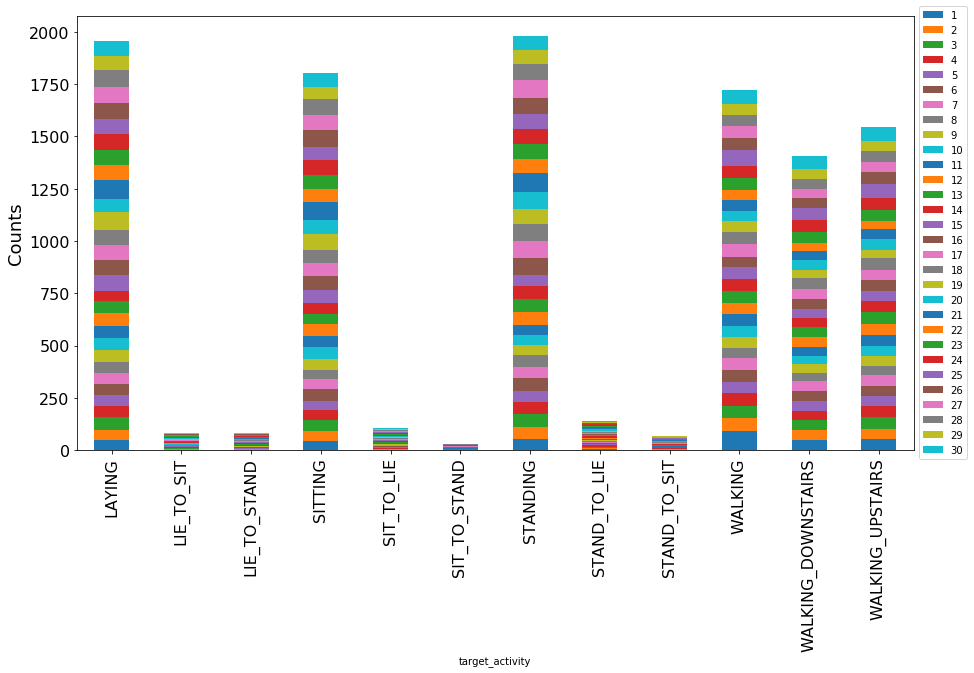

In [36]:
target_subject_table.plot(kind='bar',figsize=(15,8), stacked=True, fontsize=16).legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.boxplot(target_subject_table, 0, 'gD')
#plt.show()
plt.ylabel('Counts', fontsize=18)
plt.show()

We can also use boxplot to look at statistics about the 12 activities. 

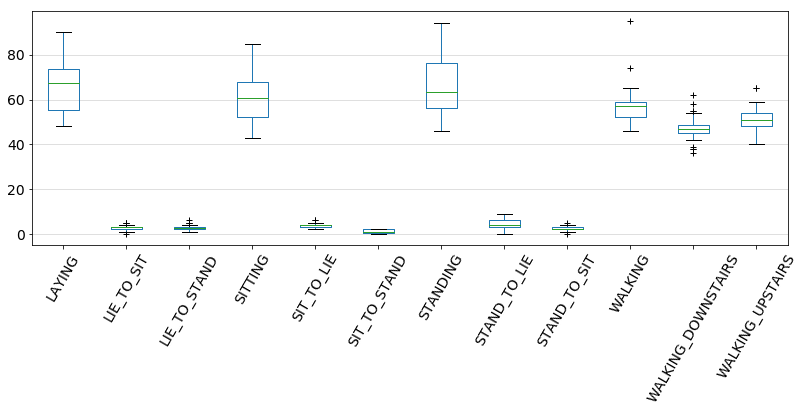

In [37]:
bp = target_subject_table.transpose().plot(kind='box', notch=0, sym='+', vert=1, whis=1.5, figsize=(12, 5), fontsize=14)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.9)
bp.set_axisbelow(True)
plt.xticks(rotation=60)
plt.show()

Certain activities have a wider spread than the others. Transitional activities have small number of counts.

## Principal Component Analysis for dimensionality reduction
#### PCA is an unsupervised learning method to transform the data to a more informative scale for further processing
One of the most common applications of PCA is visualizing high-dimensional datasets, which is exactly our case. We have 561 features.

Normally, we would scale the data so that each feature has a unit variance. The HAR data already comes with features normalized and bounded within [-1,1]. So we will skip this step.

In [38]:
from sklearn.decomposition import PCA
# By default, PCA only rotates (and shifts) the data, but keeps all principal components. 
# To reduce the dimensionality of the data, we need to specify how many components we want to keep 
# when creating the PCA object: lets keep only 2
pca = PCA(n_components=2)
# fit PCA model to the whole HAR data 
pca.fit(X)
  # transform data onto the first two principal components
X_pca = pca.transform(X)
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (10929, 561)
Reduced shape: (10929, 2)


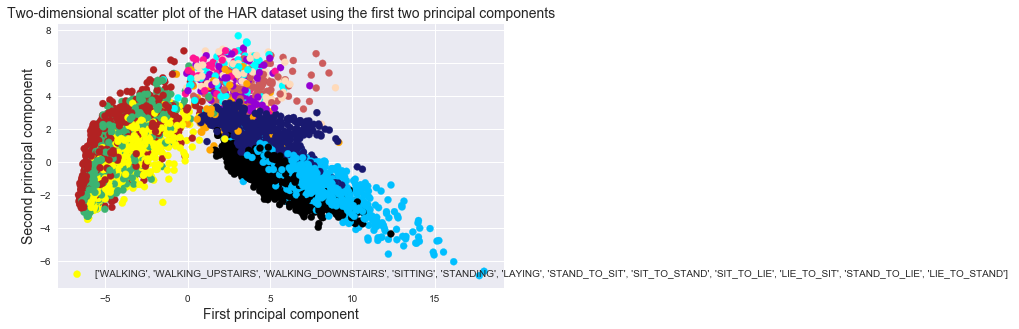

In [39]:
import seaborn as sns
# plot first vs. second principal component, colored by class

# sns.pairplot(X_pca[:, 0], X_pca[:, 1], data=X, hue=y, size=5)
# colors =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G']

#labels = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING',
#          5: 'STANDING', 6: 'LAYING', 7: 'STAND_TO_SIT', 8: 'SIT_TO_STAND', 
#          9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND'}

labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
          'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 
          'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']

colors = {'WALKING':'#000000', 'WALKING_UPSTAIRS':'#191970', 'WALKING_DOWNSTAIRS':'#00bfff', 'SITTING':'#3cb371', 
         'STANDING':'#ffff00', 'LAYING':'#b22222', 'STAND_TO_SIT':'#ffa500', 'SIT_TO_STAND':'#ff1493',
         'SIT_TO_LIE':'#9400d3', 'LIE_TO_SIT':'#00ffff', 'STAND_TO_LIE':'#cd5c5c', 'LIE_TO_STAND':'#ffdab9'}

#plt.figure(figsize=(8, 8))
fig=plt.figure(figsize=(8, 8))
ax1=fig.add_subplot(111)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y['target_activity'].apply(lambda x: colors[x]), label = labels)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
plt.title("Two-dimensional scatter plot of the HAR dataset using the first two principal components", fontsize=14)
plt.legend()
#plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [40]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 561)
PCA components:
[[ -2.58173495e-05   7.82486660e-05   1.26437068e-04 ...,  -3.73422655e-02
    2.68934328e-02   2.12956997e-02]
 [  2.57045067e-03   1.99911556e-03   1.03231756e-03 ...,   3.51510051e-02
   -1.34691711e-02  -1.91451486e-02]]


#### It would be hard to visualize 561 feature names and the PCA components. So, lets move on to Feature Extraction. 
How many principal components to choose for our new feature subspace? A good measure is the "explained variance," that tells us how much information (variance) can be attributed to each of the principal components.

In [41]:
print("PCA explained variance ratio:\n{}".format(pca.explained_variance_ratio_))
print("PCA cumulative variance explained by first i+1 dimension:\n{}".format(pca.explained_variance_ratio_.cumsum()))

PCA explained variance ratio:
[ 0.58108072  0.06262223]
PCA cumulative variance explained by first i+1 dimension:
[ 0.58108072  0.64370294]


Looks like most of the variance (64.37%) can be explained by the first two principal components alone. 

If we want more than 64% variance, we need to add more components. 

In [42]:
#Fitting PCA to the HAR dataset and transforming it into 2 principal components
pca=PCA(0.98)
X_proj = pca.fit_transform(X)
print(X_proj.shape)

(10929, 123)


We can explain 98% of the data with 123 principal components. 

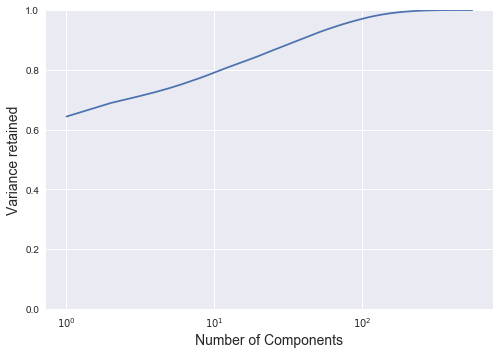

In [43]:
#How much data are we throwing away? 
#Lets try and plot number of components versus explained variance ratio as a cumulative sum to find out
pca_new = PCA(561).fit(X)
plt.semilogx(np.cumsum(pca_new.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize = 14)
plt.ylabel('Variance retained', fontsize = 14)
plt.ylim(0,1)
plt.show()

This is a nice plot showing that we need at least 100 components to retain a good ratio of variance